In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# dealing with nan values with BMI column 
df["bmi"]= df["bmi"].fillna(value=df["bmi"].mean())
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df['age'] = df['age'].astype(int)
df.dtypes

id                     int64
gender                object
age                    int32
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
df.drop('id', inplace=True, axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [10]:
df["ever_married"].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

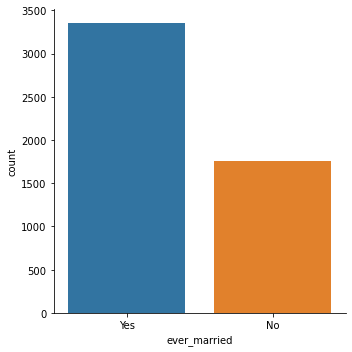

In [11]:
sns.catplot(x="ever_married",
           data=df ,
           kind="count")

In [12]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [13]:
df = df[df["gender"] != "Other"]
df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

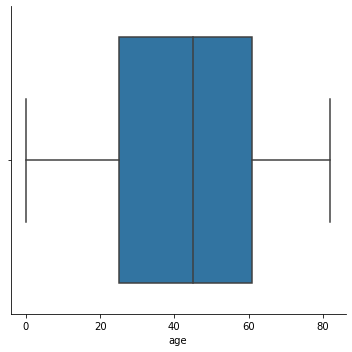

In [14]:
# know the distribtion of the age and check if there any outliers or not
sns.catplot(x="age",
           data = df,
           kind="box")

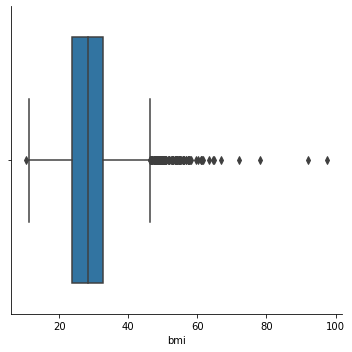

In [15]:
# checking for outliers
sns.catplot(x="bmi",
           data = df,
           kind="box")

In [16]:
df_bmi = df[df["bmi"] > 80]
df_bmi.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,Male,17,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,Male,38,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [17]:
# removing out liers
df = df[df["bmi"] < 80]

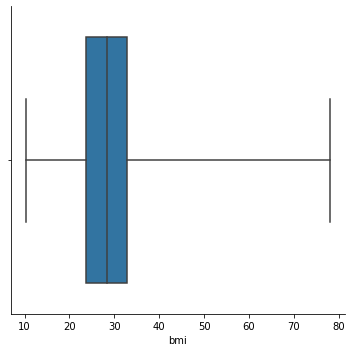

In [18]:
# changing whis to include all vaules
sns.catplot(x="bmi",
           data = df,
           kind="box",
           whis=[0,100])

In [19]:
df["smoking_status"].value_counts()

never smoked       1891
Unknown            1543
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [20]:
df["Residence_type"].value_counts()

Urban    2596
Rural    2511
Name: Residence_type, dtype: int64

In [21]:
df["work_type"].value_counts()

Private          2922
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [22]:
df["avg_glucose_level"].mean()

106.1587487761894

In [23]:
df["avg_glucose_level"].median()

91.89

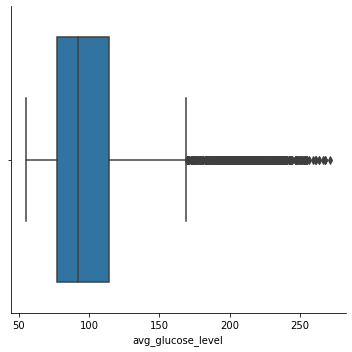

In [24]:
# i searched for glucose levels and i found it some times it over 250 so iwon't remove anything
sns.catplot(x="avg_glucose_level",
           data = df,
           kind="box")

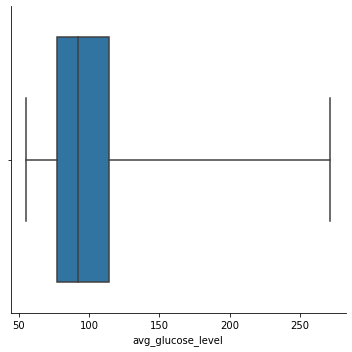

In [25]:
# we will change the whis to include all the data 
sns.catplot(x="avg_glucose_level",
           data = df,
           kind="box",
           whis = [0,100])

### making analysis on the work_type data set 

In [26]:
df_jop = df[df["work_type"] == "children"]
df_jop.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1,0,0,No,children,Urban,70.37,28.893237,Unknown,1
245,Female,14,0,0,No,children,Rural,57.93,30.900000,Unknown,1
249,Male,3,0,0,No,children,Rural,95.12,18.000000,Unknown,0
282,Female,3,0,0,No,children,Urban,73.74,16.000000,Unknown,0
290,Male,13,0,0,No,children,Urban,114.84,18.300000,Unknown,0


In [27]:
df_jop["age"].mean()

6.756914119359534

In [28]:
df_jop["age"].median()

6.0

In [29]:
df_jop["smoking_status"].value_counts()

Unknown            618
never smoked        54
formerly smoked     13
smokes               2
Name: smoking_status, dtype: int64

In [30]:
df_jop["ever_married"].value_counts()

No    687
Name: ever_married, dtype: int64

In [31]:
df_jop["gender"].value_counts()

Male      361
Female    326
Name: gender, dtype: int64

In [32]:
df_jop["bmi"].mean()

20.244238414248493

In [33]:
df_jop["bmi"].median()

19.0

# answering questions

### Q1: what is the number of male and female in each Residence_type

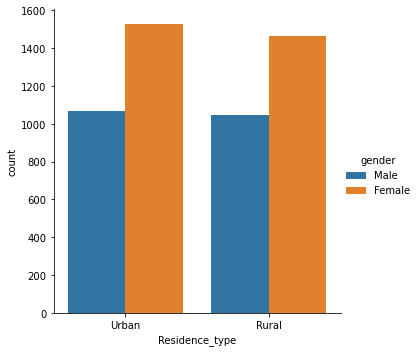

In [34]:
sns.catplot(x="Residence_type",
           data=df ,
           kind="count",
           hue="gender")

### Q2 : is there corr between marriage and hypertension ?

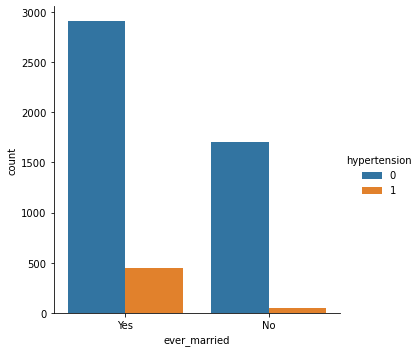

In [45]:
# checking for corr marriage and hypertension Fjo
sns.catplot(x="ever_married",
           data=df ,
           kind="count",
           hue="hypertension")

### Q3 : what is the bmi of each work type

<AxesSubplot:xlabel='bmi', ylabel='Count'>

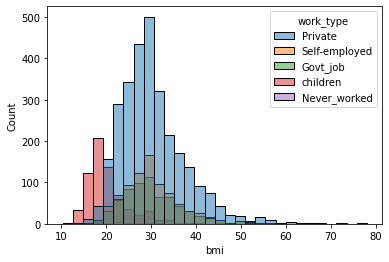

In [44]:
sns.histplot(x="bmi",
            data=df,
            hue= "work_type",
            bins=30)

### Q4 : which is the work type that has the highest number of hypertension

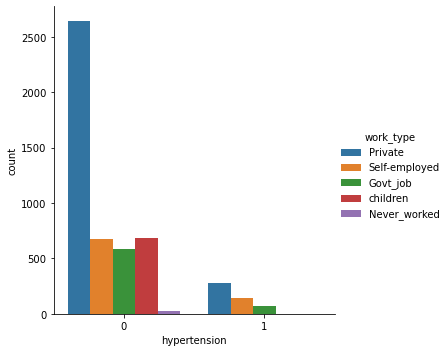

In [48]:
sns.catplot(x="hypertension",
           data=df ,
           kind="count",
           hue="work_type")

###  Q5 : is their corr between age and bmi?

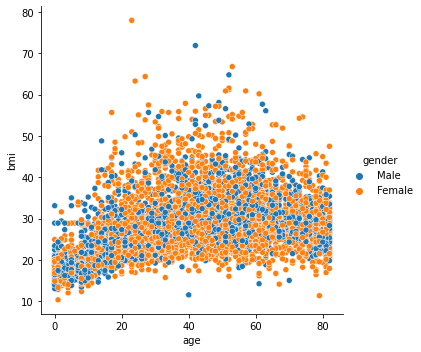

In [60]:
sns.relplot(x= "age",
           y="bmi",
           data=df,
           kind="scatter",
            hue="gender")

### Q6 :knowing what is the mean of smoking status in each gender

<function matplotlib.pyplot.show(close=None, block=None)>

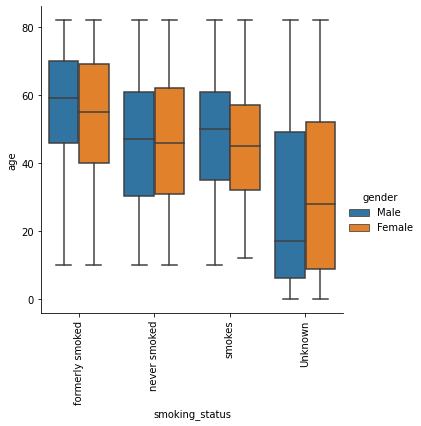

In [59]:
sns.catplot(x="smoking_status",
       y="age",
       data=df,
        kind="box",
        hue= "gender")
plt.xticks(rotation=90)
plt.show